# Caso Práctico 1: Coste de un incidente de seguridad

Predicción del coste de un incidente de seguridad en base a datos generados aleatoriamente

### 1.1. Generación de los datos

In [5]:
import numpy as np
#Creamos dos variables con una muestra de 100 observaciones aleatorias
x=2+np.random.rand(100,1)
y=4+3*np.random.randn(100,1)

### 2. Visualización

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
#Añadir gráficos dentro del Jupyter Notebook

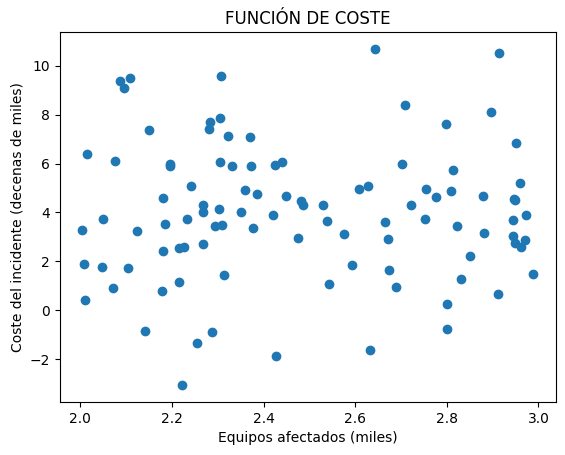

In [7]:
plt.scatter(x,y)
plt.title("FUNCIÓN DE COSTE")
plt.xlabel("Equipos afectados (miles)")
plt.ylabel("Coste del incidente (decenas de miles)")
plt.show()

### 3. Modificación del conjunto de datos

In [8]:
import pandas as pd

In [9]:
df=pd.DataFrame({"Equipos_afectados": x.flatten(),"Coste": y.flatten()}) #Conjunto de datos en un df
#Expresamos los equipos afectados en miles
df["Equipos_afectados"]=df["Equipos_afectados"]*1000
df["Equipos_afectados"]=df["Equipos_afectados"].astype(int)
#Expresamos el coste en decenas de miles
df["Coste"]=df["Coste"]*10000
df["Coste"]=df["Coste"].astype(int)
df.head(10)#Vemos las diez primeras columnas

,Equipos_afectados,Coste
0,2448,46713
1,2631,-16146
2,2359,49133
3,2087,93902
4,2721,42950
5,2255,-13211
6,2481,44624
7,2801,2748
8,2689,9714
9,2809,48640


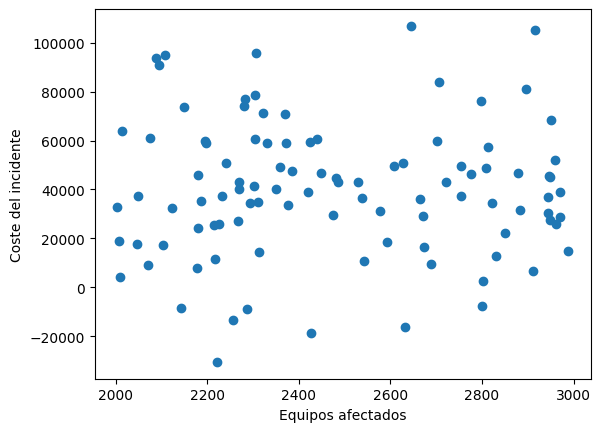

In [10]:
#Representamos el conjunto de datos
plt.scatter(df["Equipos_afectados"], df["Coste"])
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

#### 4.1. Scklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Desarrollo del modelo
lin=LinearRegression(fit_intercept=True).fit(df["Equipos_afectados"].values.reshape(-1, 1), 
                                             df["Coste"].values)

In [30]:
#Evaluación del modelo
result=pd.DataFrame({"Equipos afectados": lin.coef_,
        "Constante": lin.intercept_,
        "R2": round(lin.score(df["Equipos_afectados"].values.reshape(-1, 1), 
                                             df["Coste"].values),4)})
print(result.transpose())

                              0
Equipos afectados      0.322605
Constante          39218.441170
R2                     0.000000


In [40]:
ypred=lin.predict(df["Equipos_afectados"].values.reshape(-1,1)) 
#Realmente en este proceso se añadiría los valores test

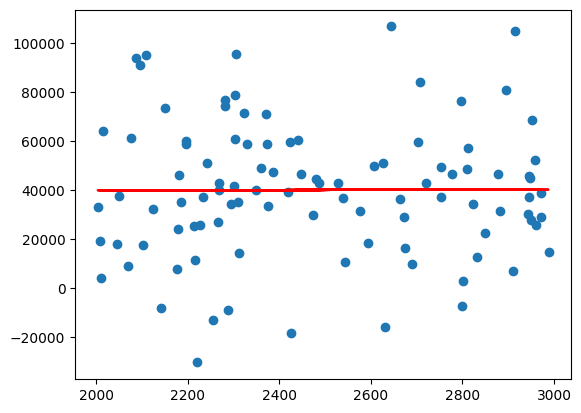

In [ ]:
#Dibujamos los resultados
plt.scatter(df["Equipos_afectados"], df["Coste"],)
plt.plot(df["Equipos_afectados"], ypred, "red")
plt.show()

#### 4.2. Statsmodels

In [14]:
import statsmodels.api as sm

In [44]:
#Desarrollo y evaluación del modelo
lin2=sm.OLS(df["Coste"].values,sm.add_constant(df["Equipos_afectados"].values.reshape(-1, 1))).fit()
print(lin2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.001224
Date:                Wed, 30 Jul 2025   Prob (F-statistic):              0.972
Time:                        11:11:47   Log-Likelihood:                -1163.9
No. Observations:                 100   AIC:                             2332.
Df Residuals:                      98   BIC:                             2337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.922e+04    2.3e+04      1.703      0.0

In [45]:
ypred2=lin2.predict()

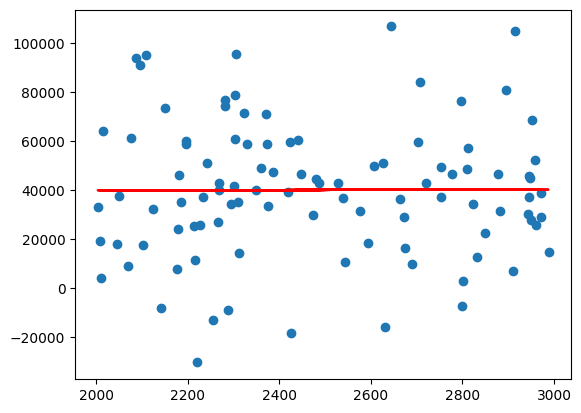

In [46]:
plt.scatter(df["Equipos_afectados"], df["Coste"],)
plt.plot(df["Equipos_afectados"], ypred2, "red")
plt.show()

In [ ]:
#DIFERENCIA ENTRE LAS ESTIMACIONES
diff_mod=ypred-ypred2
print(round(diff_mod.mean(),4))

### 5. Predicción

In [62]:
y_new

array([40024.95339271])

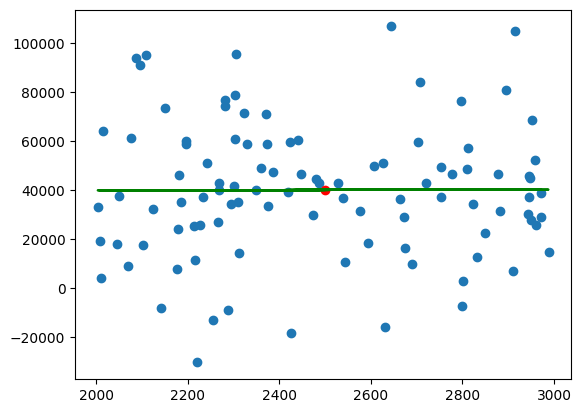

In [76]:
x_new=np.array([[2500]])

#Predicción
y_new=lin.predict(x_new)

#Dibujamos los resultados
plt.scatter(df["Equipos_afectados"], df["Coste"])
plt.plot(df["Equipos_afectados"], ypred, color="green")
plt.scatter(x_new, y_new, color="red")
plt.show()